In [ ]:
""""""

In [56]:
"""Exercises Chapter 10 - Introduction to Neural Networks
1. See online tool
2. See PP
3. Advantages of logistic regression over classical perceptron. How can we change the perceptron to be equal to logreg?
    A linear regression is able to model any linear correlation with quite ease while a classical perceptron is only able to make
    decisions based on a certain threshold, due to the nature  of his activation function. If we replace the activation function with something
    like a linear function instead of hard voting, then we could create an equal counterpart to the linear regression.

4. Why is the logistic activation key for the first MLP.
    The logistic function is smooth and differentiatable at every point. Instead of threshold logic units it can be used to estimate a probability
    instead of just three different values which allows the ANN to make more precise estimations, independend from the actual number of perceptrons.
    Further it can can be used for backpropagation algorithms by laying the base for gradient descent mechanisms. 

5. See paint

6. MLP with input layer of 10 perceptrons, hidden layer of 50 perceptrons, output layer 3 perceptrons. All phi(z) are ReLU.
    Suppose m x n matrices (rows x columns)
    a) input matrix: m x 10 
    b) hidden layer weight vector: 10 x 50, bias vector 50
    c) the output layer doesn't have a bias vector nor weighting vecotrs
    d) output matrix: m x 3
    e) see paper

7. Amount of output neurons 
    a) for ham-spam classification of emails
    Two, because it's a binary classification, a sigmoid function as output should be sufficient
    b) MNIST
    Ten, for each possible digit one neuron. same activation function
    c) Housing prizes
    One neurons with a ReLU or softmax activation

8. Back propagation
    Back propation is an algorithm that will adapt the neural network to optimize it's prediction accuracy. At first, the weight vectors of 
    each layer are assigned randomly and predictions are accordingly random aswell. After the first batch, the predictions are evaluated with 
    labelled data. Afterwards a certain cost function is calculated that will decrease if the predictions are correct. To achieve that, the 
    algorithm will change the value of all weight vectors to minimize the cost function a little bit in the direction of the next best decreasing
    value of the first derivate of the function (gradient descent). Then, a new batch of data is inserted and the algorithm continues with the
    described operation for as much iterations needed to reach the minimum of the cost function.

9. Hyperparameters for MLPs
    Activation function
    Input layer size
    Number of hidden layers
    hidden layer activation function
    Perceptron per hidden layer
    Output layer size
    Output layer activation function
    Bias yes or no
    learning rate
    l1 or l2 regularization
    back propagation algorithm
    
    If MLPs are overfitting then we could increase the amount of training data, modify the bias, reduce the amount of layers and/or perceptrons,
    increase the strength of regularization or choose another activation function. Augmenting the training data is also possible.

"""

"Exercises Chapter 10 - Introduction to Neural Networks\n1. See online tool\n2. See PP\n3. Advantages of logistic regression over classical perceptron. How can we change the perceptron to be equal to logreg?\n    A linear regression is able to model any linear correlation with quite ease while a classical perceptron is only able to make\n    decisions based on a certain threshold, due to the nature  of his activation function. If we replace the activation function with something\n    like a linear function instead of hard voting, then we could create an equal counterpart to the linear regression.\n\n4. Why is the logistic activation key for the first MLP.\n    The logistic function is smooth and differentiatable at every point. Instead of threshold logic units it can be used to estimate a probability\n    instead of just three different values which allows the ANN to make more precise estimations, independend from the actual number of perceptrons.\n    Further it can can be used for ba

Epoch 1/500
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2637 - accuracy: 0.9189 - val_loss: 0.2759 - val_accuracy: 0.9142
Epoch 2/500
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1059 - accuracy: 0.9670 - val_loss: 0.1153 - val_accuracy: 0.9645
Epoch 3/500
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0755 - accuracy: 0.9763 - val_loss: 0.0893 - val_accuracy: 0.9722
Epoch 4/500
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0565 - accuracy: 0.9818 - val_loss: 0.0859 - val_accuracy: 0.9715
Epoch 5/500
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9857 - val_loss: 0.1003 - val_accuracy: 0.9733
Epoch 6/500
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.0853 - val_accuracy: 0.9773
Epoch 7/500
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0284 - accuracy: 0.9904 - val_loss: 0.0959 - val_ac

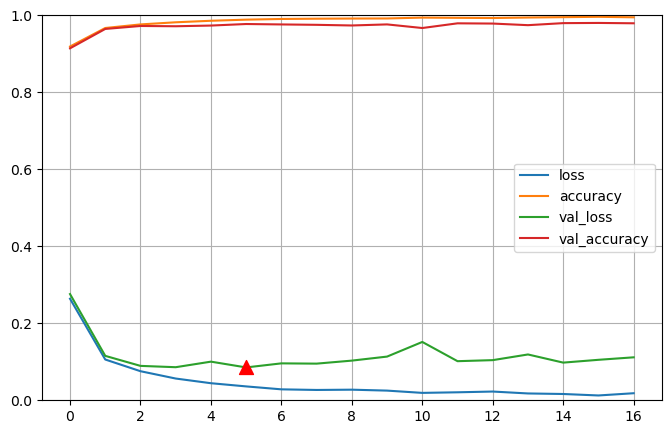

In [2]:
"""Exercise No 10: Neural Network on MNIST"""
"""Part 1: Data Preprocessing"""
from sklearn.model_selection import StratifiedShuffleSplit
from joblib import load
import numpy as np
mnist = load("C:/Users/MaxB2/Documents/Machine_Is_Learning/mnist_dataset_784_v1.joblib")
X,y = mnist["data"],mnist["target"]
X = np.array(X)
y = np.array(y.astype(np.uint8))

sss1 = StratifiedShuffleSplit(n_splits=10, test_size=(1/7))
for tr_i1, tt_i1 in sss1.split(X, y):
    X_trA = X[tr_i1] / 255.
    y_trA = y[tr_i1]
    X_tt = X[tt_i1] / 255.
    y_tt = y[tt_i1]


sss2 = StratifiedShuffleSplit(n_splits=10, test_size=(1/6))
for tr_i2, vl_i2 in sss2.split(X_trA,y_trA):
    X_tr = X_trA[tr_i2]
    y_tr = y_trA[tr_i2]
    X_v = X_trA[vl_i2]
    y_v = y_trA[vl_i2]

import pandas as pd
df_comparison = pd.DataFrame({
    "Normal Data Proportion": (pd.Series(y).value_counts() / len(y)).values,
    "Validation Set Proportion": (pd.Series(y_v).value_counts()/ len(X_v)).values,
    "Train Set Proportion":(pd.Series(y_tr).value_counts()/ len(X_tr)).values,
    "Test Set Proportion":(pd.Series(y_tt).value_counts()/ len(X_tt)).values
})
df_comparison    

from tensorflow import keras as kr
from keras.optimizers import SGD
import os
import matplotlib.pyplot as plt
"""Part 2: Model Setup"""

# Architecture
nnm = kr.models.Sequential([
    kr.layers.InputLayer(input_shape=(np.shape(X_tr)[1],)),
    kr.layers.Dense(300,activation="relu"),
    kr.layers.Dense(100,activation="relu"),
    kr.layers.Dense(10,activation="softmax"),
])

# Optimizer
sgd_opt = kr.optimizers.SGD(learning_rate=0.42623451352119446)
nnm.compile(loss="sparse_categorical_crossentropy",optimizer=sgd_opt,metrics=["accuracy"])

"""Part 3: Model Fitting and evaluation"""

root_logdir = os.path.join(os.curdir,"my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)
run_logdir = get_run_logdir()
c_cb = kr.callbacks.ModelCheckpoint("./model_logs/best_mnist_model.h5",monitor= "val_loss",save_best_only=True)
es_cb = kr.callbacks.EarlyStopping(monitor="val_loss",patience=11,restore_best_weights=True)
tb_cb = kr.callbacks.TensorBoard(run_logdir)



h1 = nnm.fit(X_tr,y_tr,epochs=500,validation_data=(X_v,y_v),callbacks=[c_cb,es_cb,tb_cb])
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(h1.history).plot(figsize=(8,5))
min_index, min_value = min(enumerate(h1.history["val_loss"]), key=lambda x: x[1])
best_nmm = kr.models.load_model("./model_logs/best_mnist_model.h5")
loss, accuracy = best_nmm.evaluate(X_tt, y_tt)
print("Test Accuracy:" ,accuracy)
plt.scatter(min_index, min_value, marker='^', color='red',s=100,zorder=10)
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [1]:
%tensorboard --logdir=./my_mnist_logs --port=6006

UsageError: Line magic function `%tensorboard` not found.
